# Lab 7. Data Assembly II

### In this lab, we will continue learning how to combine several datasets into a single one ready for analysis. This time we will learn how to combine datasets which are 

## This session will cover:

1. Advanced merging of data sets

# 1. Let's load and install some libraries

In [13]:
!pip install py-openaq

In [14]:
import pandas as pd

In [15]:
import pandas as pd
import seaborn as sns

In [16]:
import openaq

In [17]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [18]:
import warnings
warnings.filterwarnings('ignore')

## 2. Let's load some datasets

### 2.1 Let's check the API first

In [10]:
api = openaq.OpenAQ()

status, resp = api.cities(limit=5)

In [11]:
status

200

In [12]:
resp

{'meta': {'name': 'openaq-api',
  'license': 'CC BY 4.0d',
  'website': 'https://u50g7n0cbj.execute-api.us-east-1.amazonaws.com/',
  'page': 1,
  'limit': 5,
  'found': 2915,
  'pages': 583},
 'results': [{'country': 'US',
   'name': '007',
   'city': '007',
   'count': 1372,
   'locations': 5},
  {'country': 'US',
   'name': '019',
   'city': '019',
   'count': 704,
   'locations': 1},
  {'country': 'US',
   'name': '037',
   'city': '037',
   'count': 2683,
   'locations': 23},
  {'country': 'US',
   'name': '039',
   'city': '039',
   'count': 380,
   'locations': 1},
  {'country': 'US',
   'name': '047',
   'city': '047',
   'count': 101,
   'locations': 1}]}

### 2.2 Let's load some data about levels of NO2, PM25

In [29]:
## The air_quality_no2_long.csv data set provides 𝑁𝑂2 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.
air_quality_no2 = pd.read_csv('../data/air_quality_no2_long.csv',parse_dates=True)

In [30]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [31]:
## The air_quality_pm25_long.csv data set provides 𝑃𝑀25 values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.

air_quality_pm25 = pd.read_csv('../data/air_quality_pm25_long.csv',parse_dates=True)

In [32]:
air_quality_pm25.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


### 2.3 Let's load geolocation information of each monitoring station

In [33]:
## The air quality measurement station coordinates are stored in a data file air_quality_stations.csv

stations_coord = pd.read_csv("../data/air_quality_stations.csv")

In [34]:
stations_coord.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


### 2.4 Let's load additional information about each air quality pollutant

In [35]:
## The air quality parameters metadata are stored in a data file air_quality_parameters.csv

air_quality_parameters = pd.read_csv("../data/air_quality_parameters.csv")

In [36]:
air_quality_parameters

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10
5,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
6,so2,Sulfur Dioxide,SO2


## 3. Analysis of levels of NO2 and PM25

#### In this case we need to study the evolution of levels of NO2 and PM25 accross time and different cities
#### We also need to explore any potential relationship between NO2 and PM25

### 3.1 We need to combine measurements of NO2 and PM@5 into a single table
#### In this case both tables are "homogeneous" in the sense of having the same dataframe structure. We use the concat method to merge them into one.

In [53]:
air_quality_no2.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [54]:
air_quality_pm25.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


#### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/merging_concat_basic.png">


In [55]:
air_quality = pd.concat([air_quality_pm25, air_quality_no2], axis=0)

In [56]:
air_quality.sample(10)

,city,country,date.utc,location,parameter,value,unit
427,London,GB,2019-06-04 23:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1083,Antwerpen,BE,2019-05-14 02:00:00+00:00,BETR801,no2,11.5,µg/m³
1240,London,GB,2019-06-11 05:00:00+00:00,London Westminster,no2,13.0,µg/m³
113,Paris,FR,2019-06-14 06:00:00+00:00,FR04014,no2,64.3,µg/m³
1068,Antwerpen,BE,2019-05-19 04:00:00+00:00,BETR801,no2,21.0,µg/m³
1337,London,GB,2019-06-07 00:00:00+00:00,London Westminster,no2,23.0,µg/m³
1236,London,GB,2019-06-11 09:00:00+00:00,London Westminster,no2,23.0,µg/m³
1401,London,GB,2019-06-04 07:00:00+00:00,London Westminster,no2,18.0,µg/m³
1062,Antwerpen,BE,2019-05-19 10:00:00+00:00,BETR801,no2,17.5,µg/m³
329,London,GB,2019-06-09 05:00:00+00:00,London Westminster,pm25,7.0,µg/m³


### 3.2 We would like to add to the previous dataframe geolocation information 
#### In this case the tables are "heterogeneous" in the sense of having different dataframe structure. 
#### In this case we need to use join method

In [57]:
air_quality.head(3)

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³


In [58]:
stations_coord.head(3)

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486


#### We want to add the station coordinates, provided by the stations metadata dataframe, to the corresponding rows in the measurements dataframe

#### the following figure provides a visual representation of the operation we want to perform
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/08_merge_left.svg">



In [59]:
air_quality_geolocated = pd.merge(air_quality, stations_coord,how='left', on='location')

In [60]:
air_quality_geolocated.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.20966,4.43182
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.20966,4.43182
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.20966,4.43182
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.20966,4.43182
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.20966,4.43182


### 3.3 We would like to add to the previous dataframe detailed information about the pollutants
#### In this case the tables are "heterogeneous" in the sense of having different dataframe structure therefore we need to use join method

In [61]:
air_quality_geolocated.head()

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.20966,4.43182
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.20966,4.43182
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.20966,4.43182
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.20966,4.43182
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.20966,4.43182


In [62]:
air_quality_parameters

,id,description,name
0,bc,Black Carbon,BC
1,co,Carbon Monoxide,CO
2,no2,Nitrogen Dioxide,NO2
3,o3,Ozone,O3
4,pm10,Particulate matter less than 10 micrometers in...,PM10
5,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
6,so2,Sulfur Dioxide,SO2


In [63]:
air_quality_complete = pd.merge(air_quality_geolocated, air_quality_parameters,how='left', left_on='parameter', right_on='id')

In [64]:
air_quality_complete

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude,id,description,name
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³,51.20966,4.43182,pm25,Particulate matter less than 2.5 micrometers i...,PM2.5
...,...,...,...,...,...,...,...,...,...,...,...,...
4177,London,GB,2019-05-07 06:00:00+00:00,London Westminster,no2,26.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4178,London,GB,2019-05-07 04:00:00+00:00,London Westminster,no2,16.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4179,London,GB,2019-05-07 03:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2
4180,London,GB,2019-05-07 02:00:00+00:00,London Westminster,no2,19.0,µg/m³,51.49467,-0.13193,no2,Nitrogen Dioxide,NO2


### 3.4 Evolution of NO2 and PM25 accross time

#### We will use https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot

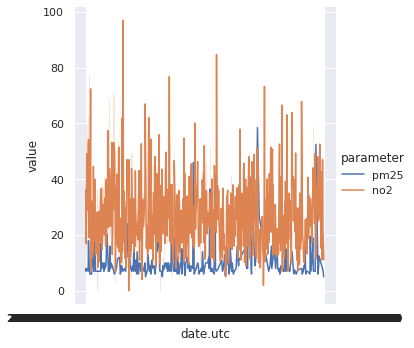

In [91]:
sns.set(rc={'figure.figsize':(10,58.27)})
sns.relplot(data=air_quality_complete.sample(1000), x="date.utc", y="value", hue="parameter", kind="line")

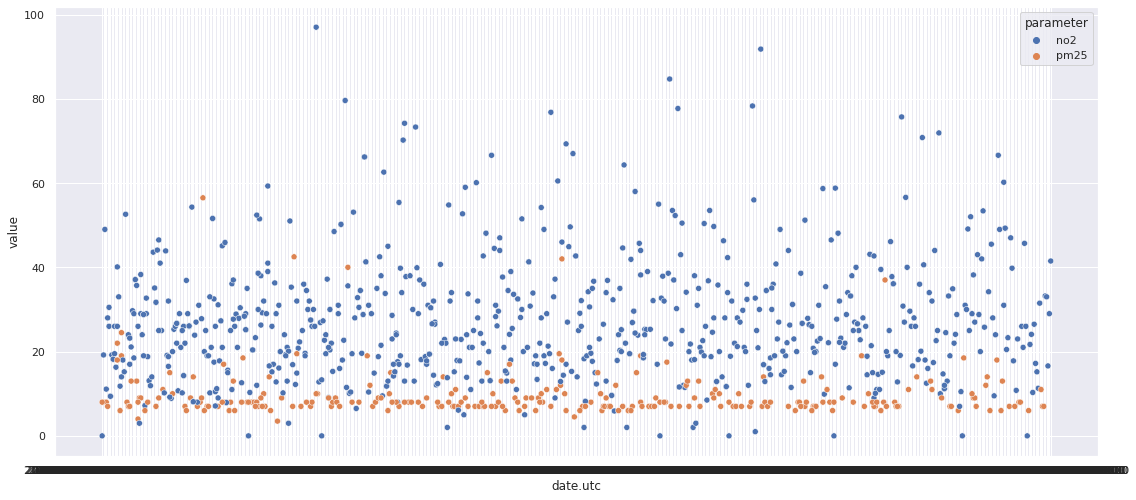

In [92]:
sns.set(rc={'figure.figsize':(18.7,8.27)})
sns.scatterplot(data=air_quality_complete.sample(1000), x="date.utc", y="value", hue="parameter")